In [1]:
import nbimporter

In [2]:
from ETLBasics import calories_to_df

In [3]:
import pandas as pd

In [4]:
from jupyter_dash import JupyterDash
import dash
from dash import html
import dash_pivottable
from datetime import date, timedelta
import re
import math
import dateutil as du

In [5]:
PATH = '../../../datasets/pmdata/'

In [6]:
df = calories_to_df(PATH, [1,2])

In [7]:
df

calories
partecipant TS                           
1           2019-11-01 00:00:00      1.39
            2019-11-01 00:01:00      1.39
            2019-11-01 00:02:00      1.39
            2019-11-01 00:03:00      1.39
            2019-11-01 00:04:00      1.39
...                                   ...
2           2020-03-31 23:55:00      1.32
            2020-03-31 23:56:00      1.20
            2020-03-31 23:57:00      1.32
            2020-03-31 23:58:00      1.32
            2020-03-31 23:59:00      1.32

[437760 rows x 1 columns]

In [8]:
df.index

MultiIndex([(1, '2019-11-01 00:00:00'),
            (1, '2019-11-01 00:01:00'),
            (1, '2019-11-01 00:02:00'),
            (1, '2019-11-01 00:03:00'),
            (1, '2019-11-01 00:04:00'),
            (1, '2019-11-01 00:05:00'),
            (1, '2019-11-01 00:06:00'),
            (1, '2019-11-01 00:07:00'),
            (1, '2019-11-01 00:08:00'),
            (1, '2019-11-01 00:09:00'),
            ...
            (2, '2020-03-31 23:50:00'),
            (2, '2020-03-31 23:51:00'),
            (2, '2020-03-31 23:52:00'),
            (2, '2020-03-31 23:53:00'),
            (2, '2020-03-31 23:54:00'),
            (2, '2020-03-31 23:55:00'),
            (2, '2020-03-31 23:56:00'),
            (2, '2020-03-31 23:57:00'),
            (2, '2020-03-31 23:58:00'),
            (2, '2020-03-31 23:59:00')],
           names=['partecipant', 'TS'], length=437760)

In [9]:
df['HOUR'] = [str(x[1])[0:13] for x in list(df.index)]
df['PARTECIPANT'] = [x[0] for x in list(df.index) ]
df

calories           HOUR  PARTECIPANT
partecipant TS                                                       
1           2019-11-01 00:00:00      1.39  2019-11-01 00            1
            2019-11-01 00:01:00      1.39  2019-11-01 00            1
            2019-11-01 00:02:00      1.39  2019-11-01 00            1
            2019-11-01 00:03:00      1.39  2019-11-01 00            1
            2019-11-01 00:04:00      1.39  2019-11-01 00            1
...                                   ...            ...          ...
2           2020-03-31 23:55:00      1.32  2020-03-31 23            2
            2020-03-31 23:56:00      1.20  2020-03-31 23            2
            2020-03-31 23:57:00      1.32  2020-03-31 23            2
            2020-03-31 23:58:00      1.32  2020-03-31 23            2
            2020-03-31 23:59:00      1.32  2020-03-31 23            2

[437760 rows x 3 columns]

In [10]:
df_agg = df.groupby(['PARTECIPANT','HOUR']).sum()

In [11]:
df_agg['MONTH'] = [ x[1][0:7] for x in list(df_agg.index)]
df_agg['YEAR'] = [ x[1][0:4] for x in list(df_agg.index)]
df_agg['WEEKDAY'] = [ f'{du.parser.parse(x[1][0:10]).weekday()}' for x in list(df_agg.index)]
df_agg['DAY'] = [ x[1][0:10] for x in list(df_agg.index)]
df_agg['PARTECIPANT'] = [x[0] for x in list(df_agg.index) ]
df_agg['HOUR'] = [ x[1] for x in list(df_agg.index)]
df_agg

calories    MONTH  YEAR WEEKDAY         DAY  \
PARTECIPANT HOUR                                                         
1           2019-11-01 00     83.40  2019-11  2019       4  2019-11-01   
            2019-11-01 01     83.82  2019-11  2019       4  2019-11-01   
            2019-11-01 02     83.54  2019-11  2019       4  2019-11-01   
            2019-11-01 03     83.96  2019-11  2019       4  2019-11-01   
            2019-11-01 04     83.96  2019-11  2019       4  2019-11-01   
...                             ...      ...   ...     ...         ...   
2           2020-03-31 19     79.94  2020-03  2020       1  2020-03-31   
            2020-03-31 20     89.24  2020-03  2020       1  2020-03-31   
            2020-03-31 21     89.52  2020-03  2020       1  2020-03-31   
            2020-03-31 22     93.25  2020-03  2020       1  2020-03-31   
            2020-03-31 23     77.06  2020-03  2020       1  2020-03-31   

                           PARTECIPANT           HOUR  
PARTECIPANT HOUR                                       
1           2019-11-01 00            1  2019-11-01 00  
            2019-11-01 01            1  2019-11-01 01  
            2019-11-01 02            1  2019-11-01 02  
            2019-11-01 03            1  2019-11-01 03  
            2019-11-01 04            1  2019-11-01 04  
...                                ...            ...  
2           2020-03-31 19            2  2020-03-31 19  
            2020-03-31 20            2  2020-03-31 20  
            2020-03-31 21            2  2020-03-31 21  
            2020-03-31 22            2  2020-03-31 22  
            2020-03-31 23            2  2020-03-31 23  

[7296 rows x 7 columns]

You can use Dash for visuyalizing your data in a pivot table
or other widgets (see [https://dash.plotly.com/](https://dash.plotly.com/) for further details).

In [12]:
app = dash.Dash(__name__)
server = app.server

app.layout = html.Div(
    dash_pivottable.PivotTable(
        data=[list(df.columns)] + df.values.tolist(),
        cols=['WEEKDAY', 'PARTECIPANT'],
        rows=['HOUR'],
        vals=['calories']
    )
)

In [13]:
app.run_server( host='0.0.0.0', port='8050')

Dash is running on http://0.0.0.0:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: development
 * Debug mode: off


 * Running on all addresses.
 * Running on http://172.20.0.3:8050/ (Press CTRL+C to quit)


Alternatively, you can use matplotlib or whatever you prefer for profiling (see [https://matplotlib.org/](https://matplotlib.org/) for further details).

In [38]:
import matplotlib.pyplot as plt

In [16]:
df_agg

calories    MONTH  YEAR WEEKDAY         DAY  \
PARTECIPANT HOUR                                                         
1           2019-11-01 00     83.40  2019-11  2019       4  2019-11-01   
            2019-11-01 01     83.82  2019-11  2019       4  2019-11-01   
            2019-11-01 02     83.54  2019-11  2019       4  2019-11-01   
            2019-11-01 03     83.96  2019-11  2019       4  2019-11-01   
            2019-11-01 04     83.96  2019-11  2019       4  2019-11-01   
...                             ...      ...   ...     ...         ...   
2           2020-03-31 19     79.94  2020-03  2020       1  2020-03-31   
            2020-03-31 20     89.24  2020-03  2020       1  2020-03-31   
            2020-03-31 21     89.52  2020-03  2020       1  2020-03-31   
            2020-03-31 22     93.25  2020-03  2020       1  2020-03-31   
            2020-03-31 23     77.06  2020-03  2020       1  2020-03-31   

                           PARTECIPANT           HOUR  
PARTECIPANT HOUR                                       
1           2019-11-01 00            1  2019-11-01 00  
            2019-11-01 01            1  2019-11-01 01  
            2019-11-01 02            1  2019-11-01 02  
            2019-11-01 03            1  2019-11-01 03  
            2019-11-01 04            1  2019-11-01 04  
...                                ...            ...  
2           2020-03-31 19            2  2020-03-31 19  
            2020-03-31 20            2  2020-03-31 20  
            2020-03-31 21            2  2020-03-31 21  
            2020-03-31 22            2  2020-03-31 22  
            2020-03-31 23            2  2020-03-31 23  

[7296 rows x 7 columns]

In [50]:
t_min = '2019-12-02 00'
t_max = '2019-12-04 00'
p_id = 1

In [51]:
selected_slice = [True if x[0] == p_id and  t_min <=  x[1]  and x[1] <= t_max else False for x in   list(df_agg.index)]

In [52]:
x = list(df_agg.loc[selected_slice].HOUR)
y1 = list(df_agg.loc[selected_slice].calories)


In [53]:
p_id = 2
selected_slice = [True if x[0] == p_id and  t_min <=  x[1]  and x[1] <= t_max else False for x in   list(df_agg.index)]
y2 = list(df_agg.loc[selected_slice].calories)

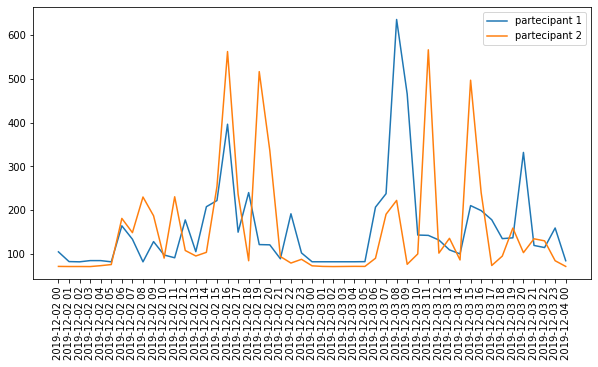

In [66]:
plt.rcParams['figure.figsize'] = [10, 5]
fig, ax = plt.subplots()
ax.plot(x,y1)
ax.plot(x,y2)
ax.legend(['partecipant 1','partecipant 2'])
plt.xticks(rotation=90)
plt.show()